In [1]:
import json

from regraph import Neo4jHierarchy, NXGraph, Rule

from kami import KamiCorpus, interactions, State, Site, Region, Protein, Protoform, Residue, RegionActor, SiteActor
from kami.data_structures.models import KamiContext, NewKamiModel
from kami.data_structures.definitions import Product, Definition

In [2]:
from regraph import NXGraph, keys_by_value, plot_rule, plot_graph
from regraph.category_utils import compose
from kami.aggregation.identifiers import EntityIdentifier

In [3]:
with open("data/egfr_example_corpus.json", "rb+") as f:
    data = json.loads(f.read())
    corpus = KamiCorpus.from_json("egfr", data)

In [4]:
protoform = Protoform(
    "P62993",
    regions=[Region(
        name="SH2",
        residues=[
            Residue("S", 90, test=True),
            Residue("D", 90, test=False)])])

ashl = Product("Ash-L", residues=[Residue("S", 90)])
s90d = Product("S90D", residues=[Residue("D", 90)])
grb3 = Product("Grb3", removed_components={"regions": [Region("SH2")]})

grb2def = Definition(protoform, [ashl, s90d, grb3])

In [5]:
protoform = Protoform(
    "P00533",
    regions=[Region(
        name="EGFR",
        residues=[
            Residue("S", 90, test=True),
            Residue("D", 90, test=False)])])

wt = Product("WT")
nopk = Product("noPK", removed_components={"regions": [Region(name="Protein kinase", start=712, end=979)]})

egfrdef = Definition(protoform, [wt, nopk])

In [6]:
context = KamiContext(
    seed_protoforms=["P00533", "P62993"],
    definitions=[grb2def, egfrdef])

In [7]:
model = NewKamiModel(
    corpus,
    context,
    "Test model",
    default_bnd_rate=0.1,
    default_brk_rate=0.1,
    default_mod_rate=0.1
)

In [8]:
model.generate_instantiation_rules()

In [9]:
rule, instance = model.action_graph_instantiation_rule()

In [10]:
rule_hierarchy, lhs_instances = corpus._hierarchy.get_rule_hierarchy(
    corpus._action_graph_id, rule, instance=instance)

In [11]:
nugget_id = "egfr_egfr_nugget_3"

In [12]:
rule, instance = model.nugget_instantiation_rule(nugget_id)

/home/raimon/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/raimon/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


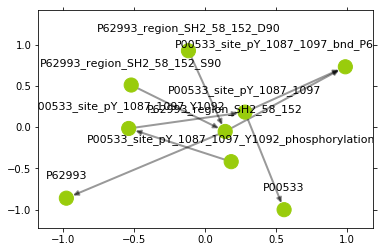

{'P00533': array([ 0.55729498, -1.        ]),
 'P00533_site_pY_1087_1097': array([0.28158683, 0.18148559]),
 'P00533_site_pY_1087_1097_Y1092': array([-0.53843544, -0.01615827]),
 'P00533_site_pY_1087_1097_Y1092_phosphorylation': array([ 0.18428674, -0.41841501]),
 'P62993': array([-0.97798036, -0.86065634]),
 'P62993_region_SH2_58_152': array([ 0.14194207, -0.05239634]),
 'P62993_region_SH2_58_152_S90': array([-0.52064114,  0.50988632]),
 'P62993_region_SH2_58_152_D90': array([-0.11718035,  0.92541621]),
 'P00533_site_pY_1087_1097_bnd_P62993_region_SH2_58_152': array([0.98912667, 0.73083782])}

In [13]:
plot_graph(rule.lhs)

In [14]:
def _empty_aa_found(identifier, node):
    """Test if an empty aa is found."""
    protoform = identifier.get_protoform_of(node)
    residues = identifier.get_attached_residues(
        protoform)
    deattach = False
    for residue in residues:
        residue_attrs = identifier.graph.get_node(residue)
        if "aa" not in residue_attrs or\
                len(residue_attrs["aa"]) == 0:
            test = list(residue_attrs["test"])[0]
            if test is True:
                deattach = True
                break
    return deattach

In [15]:
import networkx as nx
import copy

In [16]:
rule, instance = model.nugget_instantiation_rule("egfr_egfr_nugget_3")

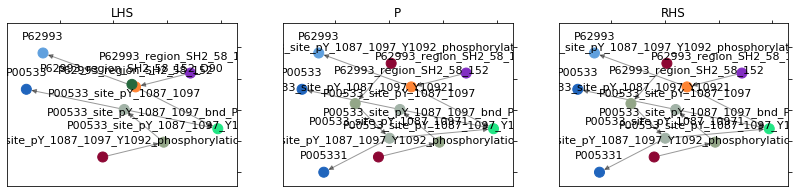

In [17]:
plot_rule(rule)

In [18]:
n = corpus.get_nugget(nugget_id)

In [19]:
nn = NXGraph.copy(n)

In [20]:
nn.rewrite(rule, instance)

{'P00533': 'P00533',
 'P005331': 'P005331',
 'P00533_site_pY_1087_1097': 'P00533_site_pY_1087_10971',
 'P00533_site_pY_1087_10971': 'P00533_site_pY_1087_1097',
 'P00533_site_pY_1087_1097_Y1092': 'P00533_site_pY_1087_1097_Y10921',
 'P00533_site_pY_1087_1097_Y10921': 'P00533_site_pY_1087_1097_Y1092',
 'P00533_site_pY_1087_1097_Y1092_phosphorylation': 'P00533_site_pY_1087_1097_Y1092_phosphorylation',
 'P00533_site_pY_1087_1097_Y1092_phosphorylation1': 'P00533_site_pY_1087_1097_Y1092_phosphorylation1',
 'P62993': 'P62993',
 'P62993_region_SH2_58_152': 'P62993_region_SH2_58_152',
 'P62993_region_SH2_58_152_S90': 'P62993_region_SH2_58_152_S90',
 'P00533_site_pY_1087_1097_bnd_P62993_region_SH2_58_152': 'P00533_site_pY_1087_1097_bnd_P62993_region_SH2_58_152'}

/home/raimon/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/raimon/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


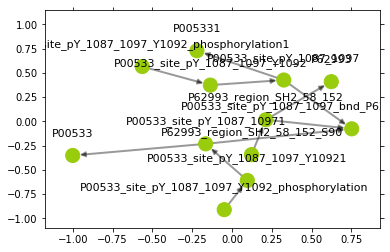

{'P00533': array([-1.        , -0.35140163]),
 'P00533_site_pY_1087_1097': array([0.32537566, 0.42666158]),
 'P00533_site_pY_1087_1097_Y1092': array([-0.13589758,  0.37423394]),
 'P00533_site_pY_1087_1097_Y1092_phosphorylation': array([-0.04842087, -0.91041345]),
 'P62993': array([0.62372425, 0.4097088 ]),
 'P62993_region_SH2_58_152': array([0.21248724, 0.01703381]),
 'P62993_region_SH2_58_152_S90': array([ 0.12289975, -0.34278698]),
 'P00533_site_pY_1087_1097_bnd_P62993_region_SH2_58_152': array([ 0.75213038, -0.07660155]),
 'P005331': array([-0.22008031,  0.72859099]),
 'P00533_site_pY_1087_10971': array([-0.16528254, -0.23162964]),
 'P00533_site_pY_1087_1097_Y10921': array([ 0.09639131, -0.60900199]),
 'P00533_site_pY_1087_1097_Y1092_phosphorylation1': array([-0.56332729,  0.56560614])}

In [21]:
plot_graph(nn)